In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import display
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, DateTime, Float

########################################################################################
import matplotlib.pyplot as plt
from random import randrange
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import dalex as dx
import pandas as pd
from scipy.stats import chi2_contingency
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from scipy.stats import chisquare
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
#######################################################################################

# THIS PART COMMENTED IS NOT IN USE YET!!!!####################################################
Base = declarative_base()
# THIS PART COMMENTED IS NOT IN USE YET!!!!####################################################


class fairdetect_group_e(pd.DataFrame):

# THIS PART COMMENTED IS NOT IN USE YET!!!!####################################################


    ## BONUS: Investigate in parallel to extend to SQLAlchemy and/or SQLite
    
    '''
    __tablename__ = 'fair_detect_results'
    tn_id = Column(Integer, primary_key = True)
    tn_dataorigin = Column(String(80))
    tn_funct_used = Column(String(80))
    tn_var_studied = Column(String(80))
    tn_analysis_time = Column(Float)
    tn_name1 = Column(String(80))
    tn_results_name1 = Column(Float)
    tn_name2 = Column(String(80))
    tn_results_name2 = Column(Float)
    tn_name3 = Column(String(80))
    tn_results_name3 = Column(Float)
    tn_name4 = Column(String(80))
    tn_results_name4 = Column(Float)
    tn_comments = Column(String(150))
    
    np.random.seed(0)
    '''   
# THIS PART COMMENTED IS NOT IN USE YET!!!!####################################################
    
    def __init__(self, pd_DF, target_var=None, ml_method_obj=None, ml_prebuilt_model=None, *args, **kwargs):
        
        super(fairdetect_group_e, self).__init__(pd_DF, *args, **kwargs)
        self.pd_DF = pd_DF
        self.target_var = target_var
        #target_var = None
        self.ml_method_obj = ml_method_obj
        #ml_method_obj = None
        self.ml_prebuilt_model = ml_prebuilt_model
        #ml_prebuilt_model = None
    
    @property
    def _constructor(self):
        def func_(*args,**kwargs):
            df = fairdetect_group_e(*args,**kwargs)
            return df
        return func_
    
    '''

    @property
    def _constructor(self):
        return FD_E_V1
    '''
    
    @classmethod
    def from_file(cls, filename, target_var=None, ml_method_obj=None, ml_prebuilt_model=None):
        
        ## EXTEND TO OTHER TYPE OF FILES -- USABILITY
        
        pd_import = pd.read_csv(filename)
        cls.target_var = target_var
        cls.ml_method_obj = ml_method_obj
        cls.ml_prebuilt_model = ml_prebuilt_model
        return cls(pd_import, cls.target_var, cls.ml_method_obj, cls.ml_prebuilt_model)
    

    
    ####################################################################################################
    
    # Intermediate useful methods for data treatment

    def encode_labels(self):
        '''docstring''' #--> ISMAEL
        '''exceptions'''
        ## THIS NEEDS TO BE GENERALIZED!!!!!!!!!!!!!!   ------>>>  MOHAMAD
        from sklearn import preprocessing
        le = preprocessing.LabelEncoder()
        self.pd_DF['sex'] = le.fit_transform(self.pd_DF['sex'])
        self.pd_DF['housing'] = le.fit_transform(self.pd_DF['housing'])
        self.pd_DF['saving_accounts'] = le.fit_transform(self.pd_DF['saving_accounts'])
        self.pd_DF['checking_account'] = le.fit_transform(self.pd_DF['checking_account'])
        self.pd_DF['purpose'] = le.fit_transform(self.pd_DF['purpose'])
        print("Succesfully Label Enconded")
        display(self.pd_DF.head(3))

        
    def X_y_split(self, target_var = None):
        '''docstring'''
        '''exceptions'''
        if target_var is not None: self.target_var = target_var
        self.y_data = self.pd_DF[[self.target_var]].copy()
        self.X_data = self.pd_DF.drop([self.target_var], axis=1).copy()
        print("Succesfully splitted: showing first 3 rows...")
        display(self.y_data.head(3)),display(self.X_data.head(3)) 

    def split_data_totrain(self, train_size_split = 0.8, random_state_split=0):
        '''docstring'''
        '''exceptions'''
        self.random_state_split = random_state_split
        self.train_size_split = train_size_split
        self.X_train, self.X_test, self.y_train, self.y_test = \
                train_test_split(self.X_data, self.y_data, train_size = \
                                 self.train_size_split, random_state = self.random_state_split)
        print("Succesfully splitted: showing first 3 rows of Train...")
        display(self.X_train.head(3)), display(self.y_train.head(3))
        print("Succesfully splitted: showing first 3 rows of Test...")
        display(self.X_test.head(3)), display(self.y_test.head(3))

    ####################################################################################################

    # Common standard data models

    def train_model(self, ml_prebuilt_model = None, ml_method_obj=None):
        
        ### EXTEND TO OTHER MODELS
        
        '''docstring'''
        '''exceptions'''
        if ml_prebuilt_model is not None: self.ml_prebuilt_model = ml_prebuilt_model
        if ml_method_obj is not None: self.ml_method_obj = ml_method_obj
        
        if self.ml_prebuilt_model == "LOG":
            print("LOG selected")
            '''exceptions'''
            from sklearn.linear_model import LogisticRegression
            self.model = LogisticRegression().fit(self.X_train, self.y_train)
            print("Logistic Regression Model Succesfully fitted!")
            print("Training Classification Accuracy:", accuracy_score(self.y_train, self.model.predict(self.X_train)))
        if self.ml_prebuilt_model == "XGB":  
            print("XGB selected")
            '''exceptions'''
            !pip install xgboost
            import xgboost
            self.model = xgboost.XGBClassifier().fit(self.X_train, self.y_train)
            print("Training Classification Accuracy:", accuracy_score(self.y_train, self.model.predict(self.X_train)))            
            print("XGBoost Model Succesfully fitted!")
    
    
        # self.ml_prebuilt_model == "LOG":
            # from sklearn.tree import DecisionTreeClassifier
            # from sklearn.ensemble import RandomForestClassifier
    
    
    ####################################################################################################

    # Specific fair_detect functions
    
    def create_labels(self,X_test,sensitive):
        
        ## MAYBE INCLUDE SELF.????
        
        '''docstring'''
        '''exceptions'''
        sensitive_label = {}
        for i in set(X_test[sensitive]):
            text = "Please Enter Label for Group" +" "+ str(i)+": "
            label = input(text)
            sensitive_label[i]=label
        return(sensitive_label)


    def representation(self,X_test,y_test,sensitive,labels,predictions):
        '''docstring'''
        '''exceptions'''
        full_table = X_test.copy()
        sens_df = {}

        for i in labels:
            full_table['p'] = predictions
            full_table['t'] = y_test
            sens_df[labels[i]] = full_table[full_table[sensitive]==i]

        contigency_p = pd.crosstab(full_table[sensitive], full_table['t']) 
        cp, pp, dofp, expectedp = chi2_contingency(contigency_p) 
        contigency_pct_p = pd.crosstab(full_table[sensitive], full_table['t'], normalize='index')

        sens_rep = {}
        for i in labels:
            sens_rep[labels[i]] = (X_test[sensitive].value_counts()/X_test[sensitive].value_counts().sum())[i]

        labl_rep = {}
        for i in labels:
            labl_rep[str(i)] = (y_test.value_counts()/y_test.value_counts().sum())[i]


        fig = make_subplots(rows=1, cols=2)

        for i in labels:
            fig.add_trace(go.Bar(
            showlegend=False,
            x = [labels[i]],
            y= [sens_rep[labels[i]]]),row=1,col=1)

            fig.add_trace(go.Bar(
            showlegend=False,
            x = [str(i)],
            y= [labl_rep[str(i)]],
            marker_color=['orange','blue'][i]),row=1,col=2)

        c, p, dof, expected = chi2_contingency(contigency_p)
        cont_table = (tabulate(contigency_pct_p.T, headers=labels.values(), tablefmt='fancy_grid'))

        return cont_table, sens_df, fig, p



    def ability(self,sens_df,labels):
        '''docstring'''
        '''exceptions'''
        sens_conf = {}
        for i in labels:
            sens_conf[labels[i]] = confusion_matrix(list(sens_df[labels[i]]['t']), list(sens_df[labels[i]]['p']), labels=[0,1]).ravel()

        true_positive_rate = {}
        false_positive_rate = {}
        true_negative_rate = {}
        false_negative_rate = {}

        for i in labels:
            true_positive_rate[labels[i]] = (sens_conf[labels[i]][3]/(sens_conf[labels[i]][3]+sens_conf[labels[i]][2]))
            false_positive_rate[labels[i]] = (sens_conf[labels[i]][1]/(sens_conf[labels[i]][1]+sens_conf[labels[i]][0]))
            true_negative_rate[labels[i]] = 1 - false_positive_rate[labels[i]]
            false_negative_rate[labels[i]] = 1 - true_positive_rate[labels[i]]

        return(true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate)



    def ability_plots(self,labels,TPR,FPR,TNR,FNR):
        '''docstring'''
        '''exceptions'''
        fig = make_subplots(rows=2, cols=2, 
                            subplot_titles=("True Positive Rate", "False Positive Rate", "True Negative Rate", "False Negative Rate"))

        x_axis = list(labels.values())
        fig.add_trace(
            go.Bar(x = x_axis, y=list(TPR.values())),
            row=1, col=1
        )

        fig.add_trace(
            go.Bar(x = x_axis, y=list(FPR.values())),
            row=1, col=2
        )

        fig.add_trace(
            go.Bar(x = x_axis, y=list(TNR.values())),
            row=2, col=1
        )

        fig.add_trace(
            go.Bar(x = x_axis, y=list(FNR.values())),
            row=2, col=2
        )

        fig.update_layout(showlegend=False,height=600, width=800, title_text="Ability Disparities")
        fig.show()

    def ability_metrics(self,TPR,FPR,TNR,FNR):
        '''docstring'''
        '''exceptions'''
        TPR_p = chisquare(list(np.array(list(TPR.values()))*100))[1]
        FPR_p = chisquare(list(np.array(list(FPR.values()))*100))[1]
        TNR_p = chisquare(list(np.array(list(TNR.values()))*100))[1]
        FNR_p = chisquare(list(np.array(list(FNR.values()))*100))[1]

        if TPR_p <= 0.01:
            print("*** Reject H0: Significant True Positive Disparity with p=",TPR_p)
        elif TPR_p <= 0.05:
            print("** Reject H0: Significant True Positive Disparity with p=",TPR_p)
        elif TPR_p <= 0.1:
            print("*  Reject H0: Significant True Positive Disparity with p=",TPR_p)
        else:
            print("Accept H0: True Positive Disparity Not Detected. p=",TPR_p)

        if FPR_p <= 0.01:
            print("*** Reject H0: Significant False Positive Disparity with p=",FPR_p)
        elif FPR_p <= 0.05:
            print("** Reject H0: Significant False Positive Disparity with p=",FPR_p)
        elif FPR_p <= 0.1:
            print("*  Reject H0: Significant False Positive Disparity with p=",FPR_p)
        else:
            print("Accept H0: False Positive Disparity Not Detected. p=",FPR_p)

        if TNR_p <= 0.01:
            print("*** Reject H0: Significant True Negative Disparity with p=",TNR_p)
        elif TNR_p <= 0.05:
            print("** Reject H0: Significant True Negative Disparity with p=",TNR_p)
        elif TNR_p <= 0.1:
            print("*  Reject H0: Significant True Negative Disparity with p=",TNR_p)
        else:
            print("Accept H0: True Negative Disparity Not Detected. p=",TNR_p)

        if FNR_p <= 0.01:
            print("*** Reject H0: Significant False Negative Disparity with p=",FNR_p)
        elif FNR_p <= 0.05:
            print("** Reject H0: Significant False Negative Disparity with p=",FNR_p)
        elif FNR_p <= 0.1:
            print("*  Reject H0: Significant False Negative Disparity with p=",FNR_p)
        else:
            print("Accept H0: False Negative Disparity Not Detected. p=",FNR_p)




    def predictive(self,labels,sens_df):
        '''docstring'''
        '''exceptions'''
        precision_dic = {}

        for i in labels:
            precision_dic[labels[i]] = precision_score(sens_df[labels[i]]['t'],sens_df[labels[i]]['p'])

        fig = go.Figure([go.Bar(x=list(labels.values()), y=list(precision_dic.values()))])

        pred_p = chisquare(list(np.array(list(precision_dic.values()))*100))[1]

        return(precision_dic,fig,pred_p)




    def identify_bias(self, sensitive,labels):
        '''docstring'''
        '''exceptions'''
        
        predictions = self.model.predict(self.X_test)
        cont_table,sens_df,rep_fig,rep_p = self.representation(self.X_test,self.y_test,sensitive,labels,predictions)

        print("REPRESENTATION")
        rep_fig.show()

        print(cont_table,'\n')

        if rep_p <= 0.01:
            print("*** Reject H0: Significant Relation Between",sensitive,"and Target with p=",rep_p)
        elif rep_p <= 0.05:
            print("** Reject H0: Significant Relation Between",sensitive,"and Target with p=",rep_p)
        elif rep_p <= 0.1:
            print("* Reject H0: Significant Relation Between",sensitive,"and Target with p=",rep_p)
        else:
            print("Accept H0: No Significant Relation Between",sensitive,"and Target Detected. p=",rep_p)

        TPR, FPR, TNR, FNR = self.ability(sens_df,labels)
        print("\n\nABILITY")
        self.ability_plots(labels,TPR,FPR,TNR,FNR)
        self.ability_metrics(TPR,FPR,TNR,FNR)


        precision_dic, pred_fig, pred_p = self.predictive(labels,sens_df)
        print("\n\nPREDICTIVE")
        pred_fig.show()

        if pred_p <= 0.01:
            print("*** Reject H0: Significant Predictive Disparity with p=",pred_p)
        elif pred_p <= 0.05:
            print("** Reject H0: Significant Predictive Disparity with p=",pred_p)
        elif pred_p <= 0.1:
            print("* Reject H0: Significant Predictive Disparity with p=",pred_p)
        else:
            print("Accept H0: No Significant Predictive Disparity. p=",pred_p)


    def understand_shap(self,labels,sensitive,affected_group,affected_target):
        '''docstring'''
        '''exceptions'''
        import shap
        explainer = shap.Explainer(self.model, seed=0, random_state=0)

        full_table = self.X_test.copy()
        full_table['t'] = self.y_test
        full_table['p'] = self.model.predict(self.X_test)
        full_table

        shap_values = explainer(self.X_test)
        sens_glob_coh = np.where(self.X_test[sensitive]==list(labels.keys())[0],labels[0],labels[1])

        misclass = full_table[full_table.t != full_table.p]
        affected_class = misclass[(misclass[sensitive] == affected_group) & (misclass.p == affected_target)]
        shap_values2 = explainer(affected_class.drop(['t','p'],axis=1))
        #sens_mis_coh = np.where(affected_class[sensitive]==list(labels.keys())[0],labels[0],labels[1])


        figure,axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
        plt.subplots_adjust(right=1.4,wspace=1)

        print("Model Importance Comparison")
        plt.subplot(1, 2, 1) # row 1, col 2 index 1   
        # I have included myself line above since fairdetect_functions.py has it but this doesn't
        shap.plots.bar(shap_values.cohorts(sens_glob_coh).abs.mean(0),show=False)
        plt.subplot(1, 2, 2) # row 1, col 2 index 1
        shap_values2 = explainer(affected_class.drop(['t','p'],axis=1))
        shap.plots.bar(shap_values2)
        #shap.plots.bar(shap_values2)

        full_table['t'] = self.y_test
        full_table['p'] = self.model.predict(self.X_test)
        #full_table=full_table[['checking_account','credit_amount','duration','sex','t','p']]

        misclass = full_table[full_table.t != full_table.p]
        affected_class = misclass[(misclass[sensitive] == affected_group) & (misclass.p == affected_target)]

        truclass = full_table[full_table.t == full_table.p]
        tru_class = truclass[(truclass[sensitive] == affected_group) & (truclass.t == affected_target)]

        x_axis = list(affected_class.drop(['t','p',sensitive],axis=1).columns)
        affect_character = list((affected_class.drop(['t','p',sensitive],axis=1).mean()-tru_class.drop(['t','p',sensitive],axis=1).mean())/affected_class.drop(['t','p',sensitive],axis=1).mean())

        #plt.figsize([10,10])
        #plt.bar(x_axis,affect_character)

        fig = go.Figure([go.Bar(x=x_axis, y=affect_character)])

        print("Affected Attribute Comparison")
        print("Average Comparison to True Class Members")
        fig.show()

        misclass = full_table[full_table.t != full_table.p]
        affected_class = misclass[(misclass[sensitive] == affected_group) & (misclass.p == affected_target)]

        #truclass = full_table[full_table.t == full_table.p]
        tru_class = full_table[(full_table[sensitive] == affected_group) & (full_table.p == affected_target)]

        x_axis = list(affected_class.drop(['t','p',sensitive],axis=1).columns)
        affect_character = list((affected_class.drop(['t','p',sensitive],axis=1).mean()-full_table.drop(['t','p',sensitive],axis=1).mean())/affected_class.drop(['t','p',sensitive],axis=1).mean())

        #plt.figsize([10,10])
        #plt.bar(x_axis,affect_character)

        fig = go.Figure([go.Bar(x=x_axis, y=affect_character)])
        print("Average Comparison to All Members")
        fig.show()

        print("Random Affected Decision Process")
        explainer = shap.Explainer(self.model, seed=0, random_state=0)
        shap.plots.waterfall(explainer(affected_class.drop(['t','p'],axis=1))[randrange(0, len(affected_class))],show=False)




# 

In [2]:
data_E = fairdetect_group_e.from_file("synthetic_credit_card_approval.csv")

C:\Users\Javier\AppData\Local\Temp\ipykernel_23108\149607660.py:61: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.pd_DF = pd_DF


In [3]:
data_E

,Num_Children,Group,Income,Own_Car,Own_Housing,Target
0,4,0,36151,0,0,0
1,0,0,36095,1,0,0
2,2,1,62110,1,1,0
3,0,1,73644,1,0,0
4,3,0,99146,0,0,1
...,...,...,...,...,...,...
499995,1,0,43299,1,1,0
499996,8,1,75956,1,1,1
499997,3,0,66476,0,0,0
499998,2,1,74524,0,0,0


In [4]:
type(data_E)

__main__.fairdetect_group_e

In [5]:
data_E.X_y_split(target_var = 'Target')

Succesfully splitted: showing first 3 rows...


C:\Users\Javier\AppData\Local\Temp\ipykernel_23108\149607660.py:119: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.y_data = self.pd_DF[[self.target_var]].copy()
C:\Users\Javier\AppData\Local\Temp\ipykernel_23108\149607660.py:120: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.X_data = self.pd_DF.drop([self.target_var], axis=1).copy()


,Target
0,0
1,0
2,0


,Num_Children,Group,Income,Own_Car,Own_Housing
0,4,0,36151,0,0
1,0,0,36095,1,0
2,2,1,62110,1,1


In [6]:
data_E.split_data_totrain()

Succesfully splitted: showing first 3 rows of Train...


C:\Users\Javier\AppData\Local\Temp\ipykernel_23108\149607660.py:129: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.X_train, self.X_test, self.y_train, self.y_test = \


,Num_Children,Group,Income,Own_Car,Own_Housing
288363,1,1,40690,0,1
64982,2,0,75469,1,0
227641,1,1,70497,1,1


,Target
288363,0
64982,0
227641,1


Succesfully splitted: showing first 3 rows of Test...


,Num_Children,Group,Income,Own_Car,Own_Housing
194257,1,1,92093,1,1
396319,2,0,81071,1,0
138738,4,0,83536,0,0


,Target
194257,1
396319,0
138738,0


In [10]:
data_E.train_model('XGB')

XGB selected
Training Classification Accuracy: 0.9742575
XGBoost Model Succesfully fitted!


In [11]:
## Using FairDetect to test biases in the 'sex' variable

sensitive = 'Group' # sensible variable one wants to test for biases
labels = {0:'Group 0',1:'Group 1'} # -----------
data_E.identify_bias(sensitive = 'Group',labels = {0:'Group 0',1:'Group 1'})

REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   Group 0 │   Group 1 │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between Group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.7159221552842456
Accept H0: False Positive Disparity Not Detected. p= 0.588169391004731
Accept H0: True Negative Disparity Not Detected. p= 0.9319949919140254
Accept H0: False Negative Disparity Not Detected. p= 0.1040665041132579


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.700437584401918


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Model Importance Comparison


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


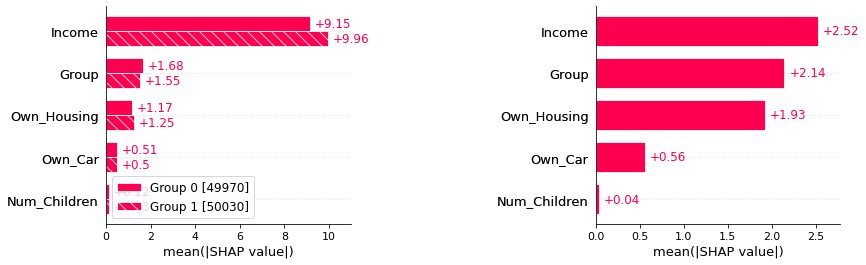

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


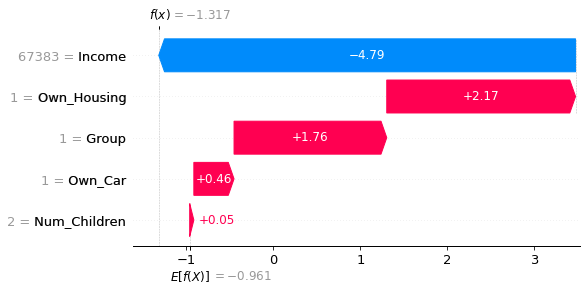

In [12]:

#sensitive = 'sex' # sensible variable one wants to test for biases
#labels = {0:'Female',1:'Male'} # 0 - Female and 1 - Male

data_E.understand_shap(labels = {0:'Group 0',1:'Group 1'},sensitive = 'Group', affected_group = 1, affected_target = 0)